# Import relevent libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Load data

In [2]:
train = pd.read_csv('C:/Users/Saurabh/Downloads/train.csv')
test = pd.read_csv('C:/Users/Saurabh/Downloads/test.csv')

## Train data

In [3]:
train.shape

(891, 12)

So train data has 891 inputs and 12 features.

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
col = ['PassengerId','Name','Ticket','Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']
train = train[col] # so that 1st 3 elemnts would represent non convertable categorical data

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Ticket       891 non-null    object 
 3   Survived     891 non-null    int64  
 4   Pclass       891 non-null    int64  
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Name             0
Ticket           0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age and Cabin has alot of missing values. Embarked has only 2 missing values.

## Test data

In [10]:
test.shape

(418, 11)

So test has 418 inputs and 11 variables. Test is one variable short which is the survivied one which we have to predict and
891 + 418 = 1309 so it is roughly 70-30 split.


In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
test = test[['PassengerId','Name','Ticket','Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]
 # so that 1st 3 elemnts would represent nonconvertable categorical data

In [13]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Name         418 non-null    object 
 2   Ticket       418 non-null    object 
 3   Pclass       418 non-null    int64  
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
test.isnull().sum()

PassengerId      0
Name             0
Ticket           0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Here also Age and cabin has alot of missing values, Fare has only 1 missing value.

# Preprocessing
##### Will remove extreamly useless features, check unique values of each features, fillna if really less are there

In [16]:
for i in train:
    a = len(train[i].unique())
    print(i,"=",a)

PassengerId = 891
Name = 891
Ticket = 681
Survived = 2
Pclass = 3
Sex = 2
Age = 89
SibSp = 7
Parch = 7
Fare = 248
Cabin = 148
Embarked = 4


All the non convertable categorical datas are useless except Name since we will use it for extracting titles rest of them are unique for every passenger so we will drop them. We will keep PassengerId in test since we are going to need it.

In [17]:
train = train.drop(['PassengerId','Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [18]:
train.head()

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",0,3,male,22.0,1,0,7.2500,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,38.0,1,0,71.2833,C85,C
2,"Heikkinen, Miss. Laina",1,3,female,26.0,0,0,7.9250,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.0,1,0,53.1000,C123,S
4,"Allen, Mr. William Henry",0,3,male,35.0,0,0,8.0500,NaN,S


In [19]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [20]:
train.groupby('Embarked').Survived.sum()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

Since S appears more in Embarked we will fill those 2 missing values with S

In [21]:
train['Embarked'] = train['Embarked'].fillna('S')

## Relation between each feature and target feature
##### Visualize data
##### Next steps:
1. chech correlation with heatmap
2. combine features who represent almost the same meaninf to the model.
3. make range variables of age and fare also fillna.
4. covert categorical into numerical and map, also fillna.
5. check heatmap again.

### Pclass

In [22]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [23]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

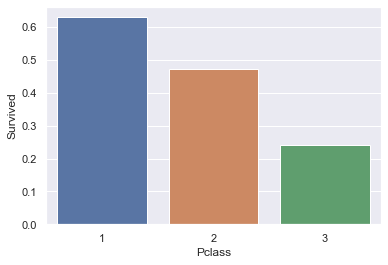

In [24]:
sns.barplot('Pclass','Survived',data = train, ci= None)

As we can see people who travelled from 1st class had more chances of survival.

### Sex

In [25]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

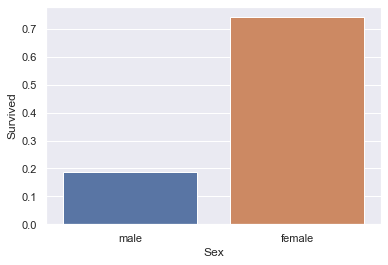

In [27]:
sns.barplot('Sex','Survived',data = train, ci=None )

Even though males were more than females , more females were survivied. 

#### Pclass and Sex

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


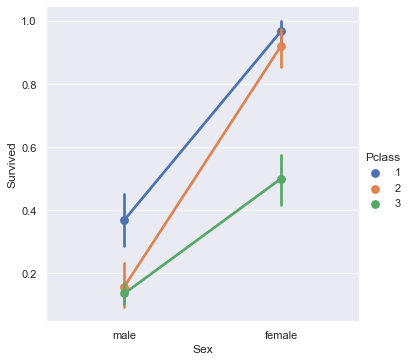

In [28]:
sns.factorplot('Sex','Survived', hue = 'Pclass', data = train)

1. Females overall had more chances of survival than males.
2. Females who had less chances of survival were from 3rd class.
3. Males from 1st class had more chances of survival than other 2.

### Embarked

In [29]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

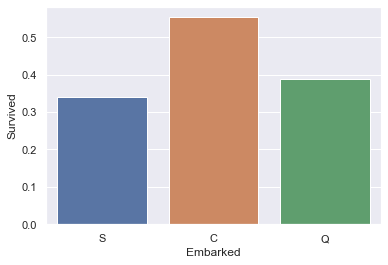

In [31]:
sns.barplot('Embarked','Survived',data = train, ci=None)

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219


<AxesSubplot:xlabel='Embarked'>

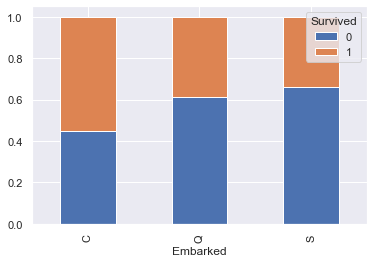

In [32]:
tab = pd.crosstab(train['Embarked'],train['Survived'])
print(tab)
tab.div(tab.sum(1), axis = 0).plot(kind = 'bar', stacked =True)

Most of the people survived were the people who boarded from port C and people who died most of them were from port S.

#### Pclass and Embarked and Sex

In [33]:
b = pd.crosstab(train['Sex'], train['Embarked'])
b

Embarked,C,Q,S
Sex,,,
female,73,36,205
male,95,41,441


In [34]:
train.groupby('Embarked')['Sex'].value_counts(normalize = True )

Embarked  Sex   
C         male      0.565476
          female    0.434524
Q         male      0.532468
          female    0.467532
S         male      0.682663
          female    0.317337
Name: Sex, dtype: float64

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


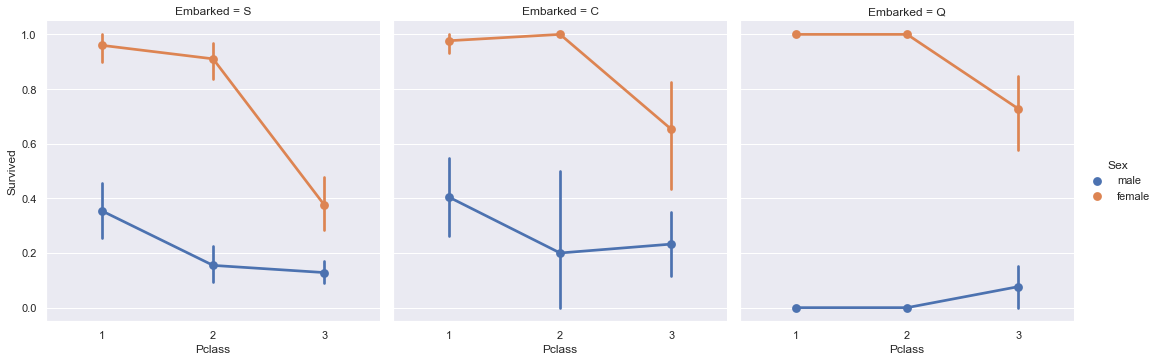

In [35]:
sns.factorplot('Pclass','Survived', hue = 'Sex', col = 'Embarked', data = train)

1. Almost all the females survived who were traveling in first 2 classes, most of the female deaths happend in 3rd class.
2. Most of the men who survived were from 1st class.
3. So over all people traveling by 3rd class had less chances of survival and from where the boarded dosent make much difference but still there is a pattern.

### Sibsp (siblings and spouse) 

In [36]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [37]:
train.groupby('SibSp').Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

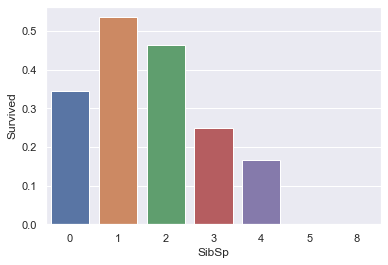

In [38]:
sns.barplot('SibSp', 'Survived', ci = None, data = train)

### Parch (parents and children)

In [39]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [40]:
train.groupby('Parch').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

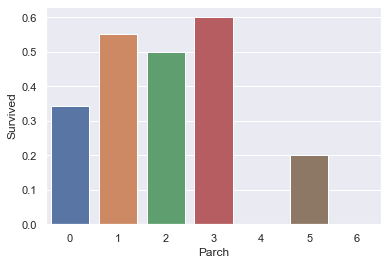

In [41]:
sns.barplot('Parch','Survived',data = train, ci = None)

In SibSp and Parch both the features we can see that people who are traveling alone have less cahnces of survival. We will check for correlation between them afterwords.

### Age

In [42]:
# Total data
total_survived = train[train['Survived']==1]
total_died = train[train['Survived']==0] 

# Male data
male_survived = train[(train['Sex']=='male') & (train['Survived']==1)]
male_died = train[(train['Sex']=='male') & (train['Survived']==0)]

# Female data
female_survived = train[(train['Sex']=='female') & (train['Survived']==1)]
female_died = train[(train['Sex']=='female') & (train['Survived']==0)]

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Female age'>

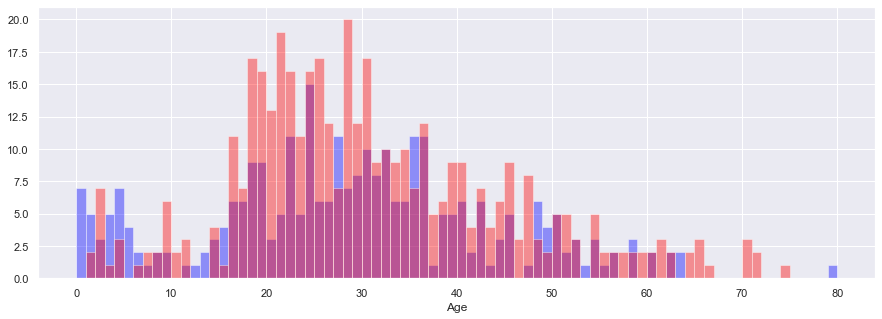

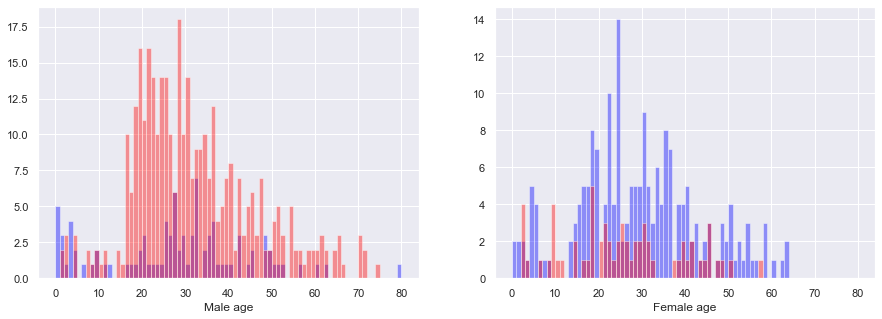

In [43]:
# Total distplot
plt.figure(figsize = [15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna(), bins = range(0,81,1), color = 'blue', kde = None)
sns.distplot(total_died['Age'].dropna(), bins = range(0,81,1), color = 'red', kde = None, axlabel = 'Age')

# Male distplot
plt.figure(figsize = [15,5])
plt.subplot(121)
sns.distplot(male_survived['Age'].dropna(), bins = range(0,81,1), color = 'blue', kde = None)
sns.distplot(male_died['Age'].dropna(),bins = range(0,81,1), color = 'red', kde = None, axlabel = 'Male age')

# Female distplot
plt.subplot(122)
sns.distplot(female_survived['Age'].dropna(), bins = range(0,81,1), color = 'blue', kde = None)
sns.distplot(female_died['Age'].dropna(),bins = range(0,81,1), color = 'red', kde = None, axlabel = 'Female age')

###### Total data
1. Children till the age 16 had more chances of survival.
2. Adults from age 18-65 had less chances of survival.

###### Male data
1. Children till the age 16 had more chances of survival.
2. Most of the people who died were from age group 18-75.

###### Female data
1. Mostly everyone survived but people from the age of 2-12, 15-34 and 38-52 had relatively less chances of survival than others.

### Fare

<AxesSubplot:xlabel='Fare', ylabel='Density'>

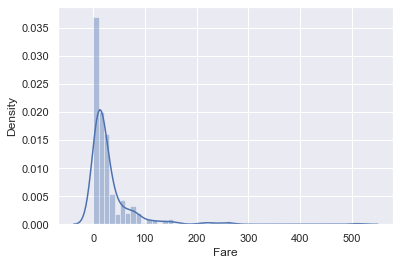

In [44]:
sns.distplot(train['Fare'])

Fare is not normally distributed and has alot of outliers which represent ticket fare of higher classes. Aslo Fare is different according to someone's age and the class they are traveling in so we need to group it.

### Cabin

In [45]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

So the letter in the cabin must represent a perticular deck and the number represent the cabin number.


<AxesSubplot:>

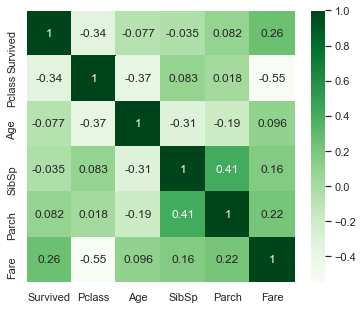

In [46]:
plt.figure(figsize=[6,5])
sns.heatmap(train.corr(), annot = True, cmap='Greens')

SibSp and Parch almost provides same info which is family size and they are positively correlated so we wil merge them.

## Maping
Mapping is a method where you can assign a numbers to perticular values since it is compatible for a model.
### Deck

In [47]:
comb = [train,test]

In [48]:
for a in comb:
    a['Deck'] = a.Cabin.str.extract('([a-zA-Z]+)')

In [49]:
a.Deck.unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [50]:
for a in comb:
    a['Deck'] = a['Deck'].map({'B':1, 'E':2, 'A':3, 'C':4, 'D':5, 'F':6, 'G':7})
    a['Deck'] = a['Deck'].fillna(0)
    a['Deck'] = a['Deck'].astype(int)

### Name

In [51]:
for a in comb:
    a['Titles'] = a.Name.str.extract(' ([A-Za-z]+)\.')

In [52]:
pd.crosstab(train['Titles'],train['Sex'])

Sex,female,male
Titles,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [53]:
train.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [54]:
for a in comb:
    a['Titles'] = a['Titles'].replace(['Don', 'Rev', 'Dr','Major', 'Lady', 'Sir', 'Col', 'Capt',\
                                       'Countess','Jonkheer'], 'Others')
    a['Titles'] = a['Titles'].replace('Ms','Mrs')
    a['Titles'] = a['Titles'].replace(['Mlle','Mme'],'Miss')

In [55]:
train['Titles'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [56]:
for a in comb:
    a['Titles'] = a['Titles'].map({'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Others':5})
    a['Titles'] = a['Titles'].fillna(0)
    a['Titles'] = a['Titles'].astype(int)

In [57]:
train.head()

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Titles
0,"Braund, Mr. Owen Harris",0,3,male,22.0,1,0,7.2500,NaN,S,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,38.0,1,0,71.2833,C85,C,4,2
2,"Heikkinen, Miss. Laina",1,3,female,26.0,0,0,7.9250,NaN,S,0,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.0,1,0,53.1000,C123,S,4,2
4,"Allen, Mr. William Henry",0,3,male,35.0,0,0,8.0500,NaN,S,0,1


### Sex

In [58]:
for a in comb:
    a['Sex'] = a['Sex'].map({'male':1,'female':0})
    a['Sex'] = a['Sex'].astype(int)

### Embarked

In [59]:
for a in comb:
    a['Embarked'] = a['Embarked'].map({'S':1,'C':2, 'Q':3})
    a['Embarked'] = a['Embarked'].astype(int)

### Age

In [60]:
train.Age.isnull().sum()

177

In [61]:
for a in comb:    
    mean = a['Age'].mean()
    sd = a['Age'].std()
    size = a.Age.isnull().sum()

    fill = np.random.randint(mean-sd, mean+sd, size = size)
    a['Age'][np.isnan(a['Age'])] = fill

<ipython-input-61-e000a43cca9f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Age'][np.isnan(a['Age'])] = fill


In [62]:
for a in comb:
    a['Age grp'] = pd.cut(a['Age'],5)
    
print(pd.cut(train['Age'],5).unique())

[(16.336, 32.252], (32.252, 48.168], (48.168, 64.084], (0.34, 16.336], (64.084, 80.0]]
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]


In [63]:
for a in comb:
    a.loc[a['Age']< 16.336, 'Age'] = 0
    a.loc[(a['Age']>= 16.336) & (a['Age']<32.252), 'Age'] = 1
    a.loc[(a['Age']>=32.252) & (a['Age']<48.168), 'Age'] = 2
    a.loc[(a['Age']>=48.168) & (a['Age']<64.084), 'Age'] = 3
    a.loc[a['Age']>64.084, 'Age'] = 4
    a['Age'] = a['Age'].astype(int)

In [64]:
train.head()

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Titles,Age grp
0,"Braund, Mr. Owen Harris",0,3,1,1,1,0,7.2500,NaN,1,0,1,"(16.336, 32.252]"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,2,1,0,71.2833,C85,2,4,2,"(32.252, 48.168]"
2,"Heikkinen, Miss. Laina",1,3,0,1,0,0,7.9250,NaN,1,0,3,"(16.336, 32.252]"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,2,1,0,53.1000,C123,1,4,2,"(32.252, 48.168]"
4,"Allen, Mr. William Henry",0,3,1,2,0,0,8.0500,NaN,1,0,1,"(32.252, 48.168]"


### Fare

In [65]:
for a in comb:
    a['Fare rng'] = pd.qcut(a['Fare'],4)

print(pd.qcut(a['Fare'],4).unique())

[(-0.001, 7.896], (7.896, 14.454], (14.454, 31.472], (31.472, 512.329]]
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.472] < (31.472, 512.329]]


In [66]:
for a in comb:
    a.loc[a['Fare']<7.896, 'Fare'] = 0
    a.loc[(a['Fare']>=7.896) & (a['Fare']<14.454), 'Fare'] = 1
    a.loc[(a['Fare']>=14.454) & (a['Fare']<31.472), 'Fare'] = 2
    a.loc[a['Fare']>=31.472, 'Fare'] = 3
    a['Fare'] = a['Fare'].astype(int)

### SibSp and Parch

In [67]:
for a in comb:
    a['Fam'] = a['SibSp'] + a['Parch'] + 1
    a.loc[a['Fam']==1, 'Alone'] = 1
    a.loc[a['Fam']>1, 'Alone'] = 0
    a['Alone'] = a['Alone'].astype(int)

1 represent the person with whome the prents/children or siblings/spouse are traveling.

In [68]:
train.head()

,Name,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Titles,Age grp,Fare rng,Fam,Alone
0,"Braund, Mr. Owen Harris",0,3,1,1,1,0,0,NaN,1,0,1,"(16.336, 32.252]","(-0.001, 7.91]",2,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,2,1,0,3,C85,2,4,2,"(32.252, 48.168]","(31.0, 512.329]",2,0
2,"Heikkinen, Miss. Laina",1,3,0,1,0,0,1,NaN,1,0,3,"(16.336, 32.252]","(7.91, 14.454]",1,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,2,1,0,3,C123,1,4,2,"(32.252, 48.168]","(31.0, 512.329]",2,0
4,"Allen, Mr. William Henry",0,3,1,2,0,0,1,NaN,1,0,1,"(32.252, 48.168]","(7.91, 14.454]",1,1


In [69]:
train.columns

Index(['Name', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Deck', 'Titles', 'Age grp', 'Fare rng', 'Fam',
       'Alone'],
      dtype='object')

In [70]:
drop = ['Name', 'SibSp', 'Parch', 'Cabin', 'Age grp', 'Fare rng', 'Fam']
train = train.drop(drop, axis = 1)
test = test.drop(drop, axis = 1)

In [71]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Titles,Alone
0,0,3,1,1,0,1,0,1,0
1,1,1,0,2,3,2,4,2,0
2,1,3,0,1,1,1,0,3,1
3,1,1,0,2,3,1,4,2,0
4,0,3,1,2,1,1,0,1,1


In [72]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Deck,Titles,Alone
0,892,3,1,2,0,3,0,1,1
1,893,3,0,2,0,1,0,2,0
2,894,2,1,3,1,3,0,1,1
3,895,3,1,1,1,1,0,1,1
4,896,3,0,1,1,1,0,2,0


# Inputs and Outputs

In [73]:
X_test = test.drop('PassengerId', axis = 1)

In [74]:
x = train.drop('Survived', axis = 1)
y = train['Survived']

# Train test split

In [75]:
from sklearn.model_selection import train_test_split

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Classifyier

## Logistic regression

In [144]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [145]:
reg.fit(x_train,y_train)

LogisticRegression()

In [146]:
reg.score(x_train, y_train)

0.7794943820224719

In [147]:
reg.score(x_test, y_test)

0.8715083798882681

In [148]:
y_log_pred = reg.predict(x_test)

In [149]:
acc_log = reg.score(x_test, y_test)
acc_log

0.8715083798882681

In [150]:
print('Accuracy is '+ str(round(acc_log*100,2))+"%")

Accuracy is 87.15%


## Decision tree

In [151]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()

In [152]:
dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [153]:
dec.score(x_train, y_train)

0.8876404494382022

In [154]:
dec.score(x_test, y_test)

0.8603351955307262

In [155]:
acc_dec = dec.score(x_test, y_test)
print('Accuracy: ' + str(round(acc_dec*100,2))+"%")

Accuracy: 86.03%


## Random forest

In [156]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier( n_estimators=100)

In [157]:
rnd.fit(x_train, y_train)

RandomForestClassifier()

In [158]:
rnd.score(x_train, y_train)

0.8876404494382022

In [159]:
rnd.score(x_test, y_test)

0.8770949720670391

In [160]:
acc_rnd = rnd.score(x_test, y_test)
print("Accuracy: " + str(round(acc_rnd*100,2))+"%")

Accuracy: 87.71%


# Confusion matrix
Confusion matrix shows how confused is our model by making a matix of Actual values vs Predicted values.

In [161]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [162]:
predictions_log = cross_val_predict(reg, x_train, y_train, cv=3)
cm_log = confusion_matrix(y_train, predictions_log)

print("LOGISTIC REGRESSION")
print(cm_log)

LOGISTIC REGRESSION
[[359  78]
 [ 84 191]]


Text(12.5, 0.5, 'Actual')

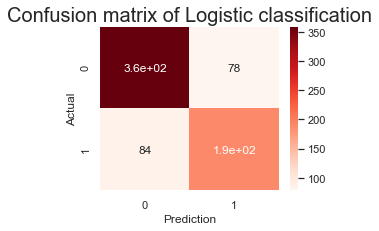

In [163]:
plt.figure(figsize=(4,3))
sns.heatmap(cm_log, annot = True, cmap = 'Reds')
plt.title('Confusion matrix of Logistic classification', fontsize = 20)
plt.xlabel('Prediction')
plt.ylabel("Actual")

In [165]:
predictions_dec = cross_val_predict(dec, x_train, y_train, cv=3)
cm_dec = confusion_matrix(y_train, predictions_dec)
print("DECISION TREE")
print(cm_dec)

DECISION TREE
[[375  62]
 [ 94 181]]


Text(12.5, 0.5, 'Actual')

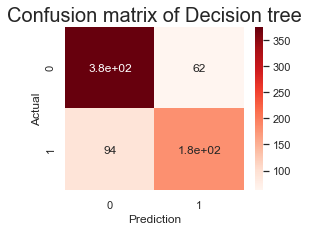

In [166]:
plt.figure(figsize=(4,3))
sns.heatmap(cm_dec, annot = True, cmap = 'Reds')
plt.title('Confusion matrix of Decision tree', fontsize = 20)
plt.xlabel('Prediction')
plt.ylabel("Actual")

In [167]:
predictions_rnd = cross_val_predict(rnd, x_train, y_train, cv=3)
cm_rnd = confusion_matrix(y_train, predictions_rnd)
print("RANDOM FOREST")
print(cm_rnd)

RANDOM FOREST
[[369  68]
 [ 91 184]]


Text(12.5, 0.5, 'Actual')

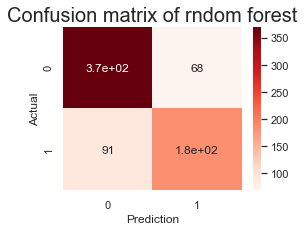

In [168]:
plt.figure(figsize=(4,3))
sns.heatmap(cm_rnd, annot = True, cmap = 'Reds')
plt.title('Confusion matrix of rndom forest', fontsize = 20)
plt.xlabel('Prediction')
plt.ylabel("Actual")

# Precision and Recall

1. Precision means out of all the predicted positives how many positives did our model predicted correctly.
2. Recall means out of all the actual positives how many positives did our model predicted correctly.

In [169]:
from sklearn.metrics import precision_score, recall_score

print("Logistic Precision:", precision_score(y_train, predictions_log)) 
print("Logistic Recall:",recall_score(y_train, predictions_log))
print("")
print("Decison Precision:", precision_score(y_train, predictions_dec)) 
print("Decision Recall:",recall_score(y_train, predictions_dec))
print("")
print("Random Precision:", precision_score(y_train, predictions_rnd)) 
print("Random Recall:",recall_score(y_train, predictions_rnd))

Logistic Precision: 0.7100371747211895
Logistic Recall: 0.6945454545454546

Decison Precision: 0.7448559670781894
Decision Recall: 0.6581818181818182

Random Precision: 0.7301587301587301
Random Recall: 0.6690909090909091


# F Score

F1-score is a harmonic mean of precision and recall.

In [170]:
from sklearn.metrics import f1_score
l = f1_score(y_train, predictions_log)
d = f1_score(y_train, predictions_dec)
r = f1_score(y_train, predictions_rnd)
print('Logistic F score: '+ str(l))
print("")
print('Decision F score: '+ str(d))
print("")
print('Random F score: '+ str(r))

Logistic F score: 0.7022058823529411

Decision F score: 0.6988416988416989

Random F score: 0.698292220113852


So overall Random forest performs better than others.

In [171]:
from sklearn.metrics import classification_report

In [172]:
cr = classification_report(y_train, predictions_rnd)

In [173]:
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       437
           1       0.73      0.67      0.70       275

    accuracy                           0.78       712
   macro avg       0.77      0.76      0.76       712
weighted avg       0.77      0.78      0.77       712



#### Coefficients of features according to the model

In [175]:
rnd.feature_importances_

array([0.13608134, 0.19997399, 0.11604588, 0.13131383, 0.06754349,
       0.11966575, 0.18803752, 0.04133821])

In [176]:
e = pd.DataFrame()
e['Features'] = x_train.columns
e['Weights'] = rnd.feature_importances_
e

,Features,Weights
0,Pclass,0.136081
1,Sex,0.199974
2,Age,0.116046
3,Fare,0.131314
4,Embarked,0.067543
5,Deck,0.119666
6,Titles,0.188038
7,Alone,0.041338


# Prediction on the Test data set.

In [177]:
X_predict = rnd.predict(X_test)

In [178]:
X_test['Predition of Survival'] =  X_predict
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Deck,Titles,Alone,Predition of Survival
0,3,1,2,0,3,0,1,1,0
1,3,0,2,0,1,0,2,0,0
2,2,1,3,1,3,0,1,1,0
3,3,1,1,1,1,0,1,1,0
4,3,0,1,1,1,0,2,0,1
